In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings
from pylab import rcParams
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [2]:
rcParams['figure.figsize'] = 14, 7
warnings.filterwarnings("ignore")

# Setup Data

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 14s 1us/step


In [5]:
X_train.shape

# we have 60000 images with shape 23x23

(60000, 28, 28)

In [6]:
X_train = X_train.reshape((X_train.shape[0], 
                           X_train.shape[1], 
                           X_train.shape[2], 
                           1))
X_train = X_train/ 255.0

In [7]:
X_test = X_test.reshape((X_test.shape[0], 
                         X_test.shape[1], 
                         X_test.shape[2], 1))
X_test = X_test/ 255.0

In [8]:
# to_categorical will convert to One Hot Encoding 

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# First Model

In [9]:
# This model is without any batch normalization
# Conv2D is a 2 dimentional convolution layer, which has 32 filters and each filter of sixe 3x3, with reul af.

model_1 = Sequential()
model_1.add(Conv2D(32, (3,3), activation="relu"))
model_1.add(MaxPooling2D((2, 2))) # Post CNN fearture map is brough down to half its size
model_1.add(Conv2D(64, (3,3), activation="relu"))
model_1.add(MaxPooling2D((2, 2)))  
model_1.add(Conv2D(64, (3,3), activation="relu"))
model_1.add(Flatten()) # Flatten layer to flattern the entier output
model_1.add(Dense(64, activation="relu"))
model_1.add(Dense(10, activation="softmax")) # Final layer for 10 output featuers
model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
batch_size = 128
epochs = 5

In [11]:
model_1_history = model_1.fit(X_train, y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(X_test, y_test))

Epoch 1/5
469/469 [==============================] - 40s 86ms/step - loss: 0.2382 - accuracy: 0.9299 - val_loss: 0.0576 - val_accuracy: 0.9804
Epoch 2/5
469/469 [==============================] - 37s 78ms/step - loss: 0.0609 - accuracy: 0.9808 - val_loss: 0.0416 - val_accuracy: 0.9870
Epoch 3/5
469/469 [==============================] - 37s 79ms/step - loss: 0.0418 - accuracy: 0.9866 - val_loss: 0.0381 - val_accuracy: 0.9876
Epoch 4/5
469/469 [==============================] - 37s 79ms/step - loss: 0.0331 - accuracy: 0.9899 - val_loss: 0.0306 - val_accuracy: 0.9897
Epoch 5/5
469/469 [==============================] - 44s 93ms/step - loss: 0.0251 - accuracy: 0.9922 - val_loss: 0.0323 - val_accuracy: 0.9895


# Model with Batch Normalization

In [12]:
# the only difference here is 2 BatchNormalizaion Layers are included after the Dense layers
# Batch Normalization is being used inorder to reach / converge to optimum values

model_2 = Sequential()
model_2.add(Conv2D(32, (3,3), activation="relu"))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Conv2D(64, (3,3), activation="relu"))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Conv2D(64, (3,3), activation="relu"))
model_2.add(Flatten())
model_2.add(Dense(64))
model_2.add(BatchNormalization())
model_2.add(Activation("relu"))
model_2.add(Dense(10))
model_2.add(BatchNormalization())
model_2.add(Activation("softmax"))

model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
model_2_history = model_2.fit(X_train, y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(X_test, y_test))

# here we can see the model reaches accuracy in 3rd eopch to 99%

Epoch 1/5
469/469 [==============================] - 39s 84ms/step - loss: 0.3552 - accuracy: 0.9648 - val_loss: 0.3139 - val_accuracy: 0.9866
Epoch 2/5
469/469 [==============================] - 43s 92ms/step - loss: 0.1423 - accuracy: 0.9890 - val_loss: 0.1012 - val_accuracy: 0.9897
Epoch 3/5
469/469 [==============================] - 42s 89ms/step - loss: 0.0858 - accuracy: 0.9922 - val_loss: 0.0658 - val_accuracy: 0.9919
Epoch 4/5
469/469 [==============================] - 40s 84ms/step - loss: 0.0572 - accuracy: 0.9941 - val_loss: 0.0571 - val_accuracy: 0.9922
Epoch 5/5
469/469 [==============================] - 44s 95ms/step - loss: 0.0422 - accuracy: 0.9956 - val_loss: 0.0376 - val_accuracy: 0.9922


# Visualize Performance

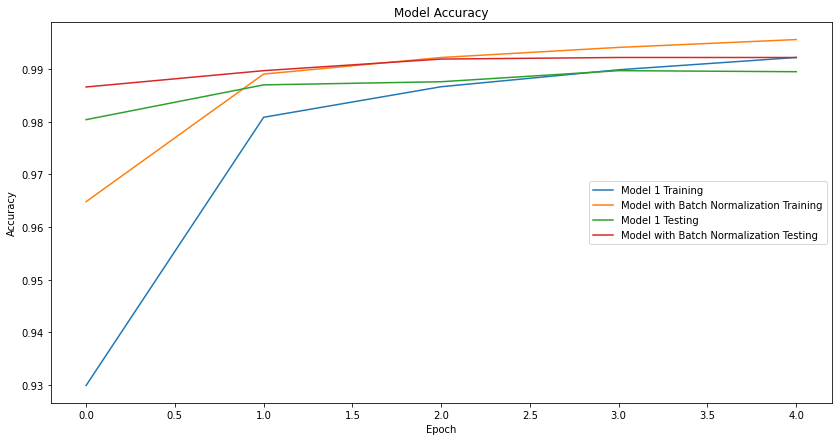

In [14]:
plt.plot(model_1_history.history['accuracy'])
plt.plot(model_2_history.history['accuracy'])
plt.plot(model_1_history.history['val_accuracy'])
plt.plot(model_2_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model 1 Training','Model with Batch Normalization Training', 
            'Model 1 Testing', 'Model with Batch Normalization Testing'],
           loc='center right')

# As we can see the orage line is giving a good and converging faster usting batch normalizaion